In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.datasets import fetch_mldata

In [83]:
mnist = fetch_mldata('mnist-original')

In [84]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [85]:
X, y = mnist['data'], mnist['target']

In [86]:
X.shape

(70000, 784)

70,000 images with each having 784 features. 

In [87]:
y.shape

(70000,)

y is the label

In [88]:
some_digit = X[36000]   #Loading 36000th digit of the dataset

some_digit_image = some_digit.reshape(28,28)    #reshaping the image into 28*28

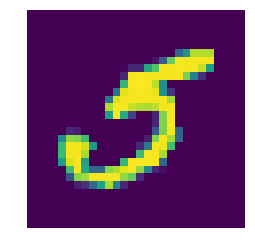

In [89]:
plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

In [103]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [104]:
#shuffling the training set
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [105]:
y_train_5 = (y_train == 5)   #true for all 5s, false for other digits
y_test_5 = (y_test == 5 )

In [106]:
from sklearn.linear_model import SGDClassifier

In [107]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\mahes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [108]:
sgd_clf.predict([some_digit])

array([ True])

In [109]:
from sklearn.model_selection import cross_val_predict
#cross_val_predict performs kfold cross validation

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\mahes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\mahes\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53914,   665],
       [ 1341,  4080]], dtype=int64)

In [111]:
from sklearn.metrics import precision_score, recall_score

In [117]:
precision_score(y_train_5, y_train_pred)

0.8598524762908325

In [118]:
recall_score(y_train_5,y_train_pred)

0.7526286662977311


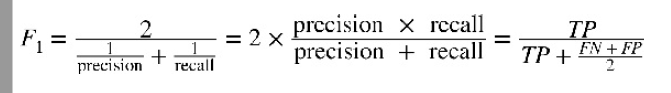

In [120]:
from sklearn.metrics import f1_score

In [123]:
f1_score(y_train_5, y_train_pred)

0.802675585284281